## Nome: Leonardo Valadão. NUSP: 10299437

# 4º Programa: Equações Diferenciais Ordinárias

### Disciplina: Cálculo Numérico com Aplicações em Física. Docente: Arnaldo Gammal.

**Entregar:** <br>
- [X] *Programa item I);*
- [X] *Valores de $y(t=5)$ e $dy/dt(t=5)$ por Euler e por RK Clássico;*
- [X] Gráficos sugeridos em II-1a, b,c;
- [X] Resposta à pergunta II-d;
- [X] Estimativa para a constante de Feigenbaum $\delta$
- [X] Todos os gráficos sugeridos em 2) e 3);
- [X] Programas de itens II-1c) e II-2).

In [1]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**I - Resolver usando Euler e Runge-Kutta Clássico (4a. ordem-Rk4) a equação diferencial ordinária de 2a ordem $\ddot{y}=12t^2+4t^3-t^4+y-\dot{y}$ para $y(0)=0$ e $\dot{y}(0)=0$. Esta equação pode ser escrita em termos de duas equaçẽos de 1a ordem na forma $\dot{y}=z$ e $\dot{z}=g(t,y,z)$ onde $g(t,y,z)=12t^2+4t^3-t^4+y-z$. Calcular $y(5)$ e $dy/dt (t=5)$ usando passo $h=0.01$ e comparar os resultados com o exato. Obs.: Solução analítica $y=t^4$. Dupla precisão! Experimente rodar em precisão simples! Para RK4 use uma rotina *seguindo a sequência:***

**subrotina $rk4(t_i, y_i, z_i, h)$** <br>
$k_{1y}=h \times z$ <br>
$k_{1z}=h \times g(t_i, y_i, z_i)$ <br>
$k_{2y}=h \times (z_i+k_{1z}/2)$ <br>
$k_{2z}=h \times g(t_i + h/2, y_i+ k_{1y}/2, z_i + k_{1z}/2$ <br>
$k_{3y}=h \times (z_i + k_{2z}/2)$ <br>
$k_{3z}=h \times g(t_i + h/2, y_i+ k_{2y}/2, z_i + k_{2z}/2$ <br>
$k_{4y}=h \times (z_i + k_{3z})$ <br>
$k_{4z}=h \times g(t_i + h/2, y_i+ k_{3y}/2, z_i + k_{3z}/2$ <br>
$y_i=y_i+(k_{1y}+2 k_{2y}+2 k_{3y}+k_{4y})/6$ <br>
$z_i=z_i+(k_{1z}+2 k_{2z}+2 k_{3z}+k_{4z})/6$ <br>
$t_i = t_i + h $ <br>

Equações e condições: <br>
$y' = z$ <br>
$z' = g(t,y,z)$ <br>
$g(t,y,z) = 12t^2 + 4t^3 - t^4 + y - z$ <br><br>
$y_0=0$ <br>
$z_0=0$ <br>
$h = 0.01$

Método de Euler:

In [2]:
# Definir Método de Euler
def euler(f, y0, z0, h, tf, t0=0):
    '''
    Retorna a solução por Método de Euler de uma E.D.O de segundo grau. Retorna [y,y']
    ---
    f: Função contemplada;
    y0: Condição y inicial;
    z0: Condição z (ou y') inicial;
    h: Tamanho do passo;
    tf: Valor final a ser calculado;
    t0: Onde começar a contar a variável independente. Padrão: 0;
    '''
    yi = y0
    ti = t0
    zi = z0
    # Enquanto a variável independente não chegar no valor final...
    while ti<tf: 
        yi = yi + h*zi
        zi = zi + h*f(ti,yi,zi)
        ti = ti+h
    return yi,zi

Método de Runge-Kutta Clássico de 4ª ordem:

In [3]:
# Definir Método de RK4
def rk4(f, y0, z0, h, tf, t0=0):
    '''
    Retorna a solução por método de Runge-Kutta (4ª ordem) de uma E.D.O de segundo grau. Retorna [y,y']
    f: Função contemplada;
    y0: Condição y inicial;
    z0: Condição z (ou y') inicial;
    h: Tamanho do passo;
    tf: Valor final a ser calculado;
    t0: Onde começar a contar a variável independente. Padrão: 0;
    '''
    yi = y0
    zi = z0
    ti = t0
    while ti<tf:
        k1y = h*zi
        k1z = h*f(ti,yi,zi)
        k2y = h*(zi+k1z/2)
        k2z = h*f(ti+h/2, yi+k1y/2, zi+k1z/2)
        k3y = h*(zi+k2z/2)
        k3z = h*f(ti+h/2, yi+k2y/2, zi+k2z/2)
        k4y = h*(zi+k3z)
        k4z = h*f(ti+h/2, yi+k3y/2, zi+k3z/2)
        
        yi=yi + (k1y+2*k2y+2*k3y+k4y)/6
        zi=zi + (k1z+2*k2z+2*k3z+k4z)/6
        ti+=h
        
    return yi,zi

Aplicar métodos

In [4]:
# Definir função a ser utilizada
def g(t,y,z):
    return (12*t**2 + 4*t**3 - t**4 + y - z)

# Aplicar
se = euler(g, y0=0, z0=0, h=0.01, tf=5)
srk4 = rk4(g, y0=0, z0=0, h=0.01, tf=5)

# Imprimir
print('Valores encontrados para t=5:',
      '\n Método de Euler: y={:.2f}, z={:.2f}'.format(se[0], se[1]),
      '\n Método de Runge-Kutta (ordem 4): y={:.2f}, z={:.2f}'.format(srk4[0], srk4[1]))
print('\nValores esperados: y={:.2f}, z={:.2f}'.format(5**4, 4*5**3))

Valores encontrados para t=5: 
 Método de Euler: y=627.66, z=503.88 
 Método de Runge-Kutta (ordem 4): y=629.62, z=502.71

Valores esperados: y=625.00, z=500.00


Os valores acima estão razoavelmente distantes do esperado pois o passo escolhido é muito grande. Observe o que ocorre quando diminuímos o passo:

In [5]:
passo=0.00001
print('Método de Euler: y={:.2f}, z={:.2f}'.format(
    euler(g, y0=0, z0=0, h=passo, tf=5)[0],euler(g, y0=0, z0=0, h=passo, tf=5)[1]))
print('Método de Runge-Kutta: y={:.2f}, z={:.2f}'.format(
    rk4(g, y0=0, z0=0, h=passo, tf=5)[0],rk4(g, y0=0, z0=0, h=passo, tf=5)[1]))

Método de Euler: y=625.00, z=500.00
Método de Runge-Kutta: y=625.00, z=500.00


**II - Equação de Duffing, Double Wall Potential** <br>

**1) Espaço de fase** <br>
**a) Substitua a eq. anterior do item I) pela do potencial poço duplo $\ddot{x}-\frac{1}{2}x(1-x^2)=0$ com $x(0)=1$ para os casos $\dot{x}(0)=-0.1, -0.5, -1.0$. Construa os diagramas de espaço de fase $\dot{x}(t) \times x(t)$. Basta evoluir $rk4(t_i, x_i, v_i, h)$, $v=\dot{x}$.**

$x'=z$<br>
$z'=g(t,x,z)$<br>
$g(t,x,z)=\frac{1}{2} x(1-x^2)$
<br><br>
$x_0 = 1$ <br>
$z_0=-0.1,-0.5,-1.0$ <br>
$h=0.01$

Para melhorar o desempenho do programa, vamos separar duas funções rk4. Uma retorna x, outra v.

In [6]:
# Definir função
def g(t,x,z):
    return (1/2 * x*(1-x**2))

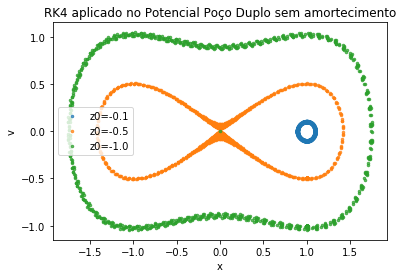

In [7]:
# Plotar
# Definir região t a ser plotada
a=0
b=100
# Definir passo e constantes
step = 0.1
zs = [-0.1, -0.5, -1]
# Loop para imprimir com as 3 constantes

for z in zs:
    # Definir x
    x = [0]
    for t in np.arange(a,b,step):
        x.append(rk4(g, y0=1, z0=z, h=0.01, tf=t, t0=10)[0])
    # Definir x'
    v = [0]
    for t in np.arange(a,b,step):
        v.append(rk4(g, y0=1, z0=z, h=0.01, tf=t, t0=10)[1])

    # Plotar
    plt.plot(x, v, label='z0={:.1f}'.format(z),
             marker='.', markersize=5, lw=0, alpha=0.75)
    # Imprimir checkup apenas para monitorar demora do algoritmo
# Embelezar gráfico
plt.title('RK4 aplicado no Potencial Poço Duplo sem amortecimento')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

**b) Inclua amortecimento com $\ddot{x}+2\gamma \dot{x} - \frac{1}{2}x(1-x^2)=0$ e com $x(0)=1$, $\dot{x}(0)=-1$ e $2\gamma=0.25, 0.8$. Construa os gráficos de espaço de fase.** 

$x' = z$ <br>
$z' = g(t,x,z)$ <br>
$g(t,x,z) = \frac{1}{2}x(1-x^2) - 2\gamma z$
<br><br>
$x_0=1$ <br>
$z_0=-1$<br>
$2\gamma=0.25,0.8$ <br>
$h=0.01$

In [6]:
# Definir função
def g(t,x,z):
    return (1/2 * x*(1-x**2) - gamma*z)

Checkup 1
Checkup 2


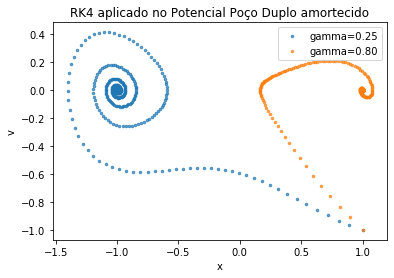

In [17]:
# Condições de contorno
gs = [0.25, 0.8]
a=0
b=100
step=0.1

# Repetir para todo gamma
for gamma in gs:
    gamma=gamma
    x = []
    for t in np.arange(a,b,step):
        x.append(rk4(g, y0=1, z0=-1, h=0.01, tf=t)[0])
    v = []
    for t in np.arange(a,b,step):
        v.append(rk4(g, y0=1, z0=-1, h=0.01, tf=t)[1])

    # Plotar
    plt.plot(x, v, label='gamma={:.2f}'.format(gamma),
             marker='.', markersize=5, lw=0, alpha=0.7)
    
    # Checkup para verificar andamento do programa
    print('Checkup',str(gs.index(gamma)+1))

# Detalhes do gráfico
plt.title('RK4 aplicado no Potencial Poço Duplo amortecido')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

**c) Force o sistema com $\ddot{x}+0.25\dot{x}-0.5x(1-x^2)=F cos (\omega t)$. Usando $x(0)=1, \dot{x}(0)=-1$ e $\omega = 1$, vá aumentando a intensidade da força $F$ com valores de $0.22, 0.23, 0.28, 0.35$. Force bastante o sistema com $F=0.6$. Em todo este item remova o transiente para construir os diagramas de espaço de fase.**

$x'=z$<br>
$z'=g(t,x,z)$ <br>
$g(t,x,z)=F cos(\omega t) - 0.25 z + 0.5x(1-x^2)$
<br><br>
$x_0=1$<br>
$z_0=-1$<br>
$\omega=1$<br>
$F=0.22,0.23,0.28,0.35,0.6$ <br>
$h=0.01$

In [21]:
# Definir função
def g(t,x,z):
    return (F*np.cos(w*t) - 0.25*z + 0.5*x*(1-x**2))

Checkup 1
Checkup 2
Checkup 3
Checkup 4
Checkup 5


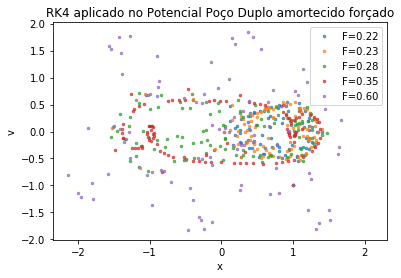

In [24]:
# Condições de contorno
Fs = [0.22, 0.23, 0.28, 0.35, 0.6]
a = 0
b = 100
step = 1

# Repetir para todo F
for F in Fs:
    w=1
    x = [rk4(g, y0=1, z0=-1, h=0.01, tf=t)[0]
         for t in np.arange(a,b,step)]
    v = [rk4(g, y0=1, z0=-1, h=0.01, tf=t)[1]
         for t in np.arange(a,b,step)]

    # Plotar
    plt.plot(x, v, label='F={:.2f}'.format(F),
             marker='.', markersize=5, lw=0, alpha=0.7)
    
    # Checkup
    print('Checkup',str(Fs.index(F)+1))
    
# Gráfico
plt.title('RK4 aplicado no Potencial Poço Duplo amortecido forçado')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

**d) Quem são os atratores em cada um desses casos nos itens a, b, c?**

No item a, os atratores são as formas constantes que aparecem. Como o sistema não é amortecido, não temos um poço de energia, mas uma energia estática, de modo que a forma do diagrama de fase se mantém constante. Temos, então, um círculo ($z_0=-0.1$), um símbolo de infinito, representando um sistema que oscila entre dois poços passando pelo equilíbrio $x=0$, $v=0$ ($z_0=-0.5$) e um sistema que oscila entre os dois poços em energias mais elevadas ($z_0=-1.0$).

No item b, os atratores são representados pelos pontos $(-1, 0)$ (com $\gamma=0.25$) e $(1,0)$ (com $\gamma=0.8$). Uma vez que o sistema é amortecido e tende à menor faixa de energia, mas em um Poço Duplo temos duas faixas mínimas de energia possíveis, em cada $\gamma$ o sistema cai em um poço diferente.

Já no item c, não é possível identificar atratores claros. Isso acontece pela dificuldade de olhar para os itens após o transiente, isto é, após o ponto onde o sistema é instável. 

**2) Diagrama de Bifurcação**

**Uma secção de Poincaré corresponde neste caso a uma "fotografia estroboscópica" do Espaço de Fase a cada período do elemento forçados. Pode ser imaginada como cortes periódicos no atrator tridimensional desenhado com $\dot{x}(t) \times x(t) \times t$.** <br>
**Construa outro programa com eq. e MESMAS condições iniciais 1c). Para um dado $F$ faça secções de Poincaré e determine o valor dos pontos $x$ nas secções. Varie o $F$ de $0$ até $0.7$ e plote $x$ (em $\omega t = 2\pi n + cte$) em função de $F$, SEM LIGAR os pontos. Escolha por simplificade $cte=0$. Estime o valor da *constante de Feigenbaum* $\delta$ a partir do diagrama de bifurcação.** <br>
**Sugestão: Escolhemos $h$ como uma fração do período como por exemplo $h=0.001 * 2\pi / \omega$ e após $1000$ passos teremos andado um período.**

**Sugestão de Programa** <br> <br>
**Repetir de $F=0$ até $F=0.7$ passo $\Delta F = 0.0005$** <br>
&nbsp; **colocar condições iniciais** <br>
&nbsp; **$h=0.01 * 2\pi / \omega$** <br>
&nbsp; **Evoluir o transiente com $200000$ passos** <br>
&nbsp;&nbsp;&nbsp; **chamar $rk4(t_i, x_i, v_i, h)$** <br>
&nbsp; **fim do transiente** <br>
&nbsp; **$h = 0.001*2\pi /\omega$** <br>
&nbsp; **Fatransiente transiente zer de $i=1$ até $100!$ evolução de $100$ períodos** <br>
&nbsp;&nbsp; **Fazer de $j=1$ até $1000!$ evolui um período** <br>
&nbsp;&nbsp;&nbsp; **chamar $rk4(t_i, x_i, v_i, h)$** <br>
&nbsp;&nbsp; **fim do loop em $j$** <br>
&nbsp;&nbsp; **Imprime $F, x_i$ imprime a cada período $2\pi /\omega$** <br>
&nbsp; **fim do loop em $i$** <br>
**fim do loop em $F$**

Devido às limitações do Python, esta parte foi feita em C. O código em C pode ser visto a seguir. Com o código, é gerado um arquivo .csv que gera todos os dados necessários para este programa. Com os dados em mãos, o gráfico será gerado com Python.

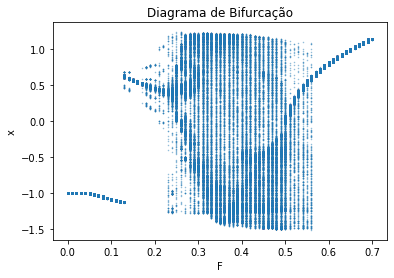

In [8]:
# Importar dados gerados em C
df2 = pd.read_csv('q2.csv')

# Fazer gráfico
plt.plot(df2['Fa'], df2['xa'],
        marker='.', markersize=1, lw=0, alpha=0.5)

plt.title('Diagrama de Bifurcação')
plt.xlabel('F')
plt.ylabel('x')
plt.show()

Ampliando o gráfico, vemos as seções de bifurcação.

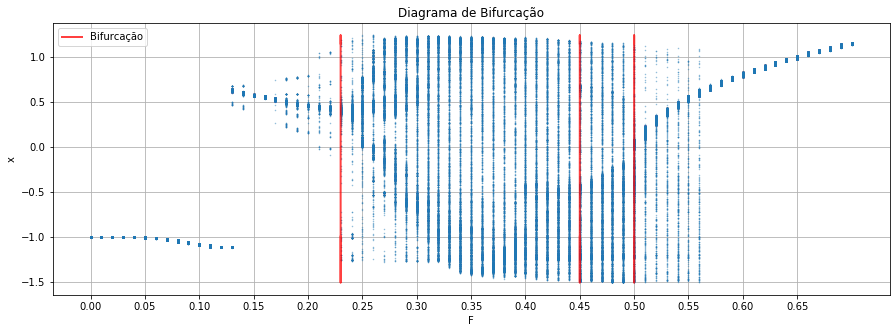

In [9]:
# Fazer novo gráfico
plt.figure(figsize=(15,5))
plt.plot(df2['Fa'], df2['xa'],
        marker='.', markersize=1, lw=0, alpha=0.5)
plt.plot([0.23 for i in df2['xa']], df2['xa'], label='Bifurcação',
        color='red', lw=2, alpha=0.75)
plt.plot([0.45 for i in df2['xa']], df2['xa'],
        color='red', lw=2, alpha=0.75)
plt.plot([0.5 for i in df2['xa']], df2['xa'],
        color='red', lw=2, alpha=0.75)

plt.title('Diagrama de Bifurcação')
plt.xlabel('F')
plt.ylabel('x')
plt.xticks(np.arange(0,0.7,0.05))
plt.grid()
plt.legend(loc='upper left')
plt.show()

Visualmente, vamos estabelecer os seguintes pontos para as bifurcações do gráfico acima: <br>
$0.22$, $0.45$, $0.50$ <br>
Assim, a constante de Feigenbaum se torna <br>
$\delta = \frac{0.45-0.22}{0.50-0.45} = 4.60$<br>
Que é uma aproximação do valor real, $\delta=4.6692$.

**3) Mapa de Poincaré** <br>
**No programa 2) remova o loop de $F$. Fixe $F=0.28$ e faça $i$ ir até $20000$. No comando "imprime", imprima também $v_i(\equiv \dot{x}(t))$. Coloque os pontos $(x_i, v_i)$ num gráfico $\dot{x}(t) \times x(t)$. NÃO LIGUE os pontos.**

Novamente, o programa foi feito em C para gerar dados:

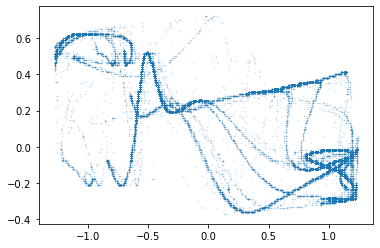

In [21]:
# Imprimir Mapa de Poincaré
df3 = pd.read_csv('q3.csv')
plt.plot(df3['xa'], df3['va'],
        marker='.', markersize=1, lw=0, alpha=0.2)